In [1]:
import pandas as pd
import numpy as np
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import svm
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.utils import shuffle

Read in Stroke Dataset

In [2]:
strokeDatasetURL = 'https://raw.githubusercontent.com/JosiahJoeking/Stroke-Dataset/main/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(strokeDatasetURL)

Calculate Average of stroke

In [3]:
strokeAVG = df.loc[:, 'stroke'].mean()

In [4]:
BMI_avg = df.loc[:, 'bmi'].mean()
df = df.fillna(value = BMI_avg)

df.drop(columns=['id'], inplace=True)

nan_df = df[df.isna().any(axis=1)]
no_nan_df = df.dropna()

In [5]:
df_encoded = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

In [6]:
k_folds = 5

In [7]:
inputs = df_encoded.drop("stroke", axis=1).copy()
target = df_encoded["stroke"]

X = inputs.values
y = target.values

kf = KFold(n_splits = k_folds)
kf.get_n_splits(X)

5

In [8]:
clf = svm.SVC(kernel = 'linear')

cm = np.zeros((2, 2))
acc_score = []
f1_score_array = []
classification_reports = []

for fold_idx, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf.fit(X_train, y_train)

    pred_values = clf.predict(X_test)

    cm += confusion_matrix(y_test, pred_values)

    report = classification_report(y_test, pred_values)

    classification_reports.append(report)

    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)

    f1 = f1_score(pred_values,  y_test)
    f1_score_array.append(f1)

avg_acc_score = np.mean(acc_score)

print('Confusion matrix:')
print(cm)

print('\nClassification Reports:')
for fold_idx, report in enumerate(classification_reports):
    print('Classification Report for fold', fold_idx + 1, ':')
    print(report)

avg_acc_score = sum(acc_score)/5

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))
print('Avg F1 : {}'.format(np.mean(f1_score_array)))
tn, fp, fn, tp = cm.ravel()
wicm = (10*fn + fp)/(tn + fp + fn + tp)
print('Weighted incorrect classification metric: {}'.format(wicm))

c:\Users\josia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\josia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\josia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Confusion matrix:
[[4861.    0.]
 [ 249.    0.]]

Classification Reports:
Classification Report for fold 1 :
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       969
           1       0.00      0.00      0.00        53

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022

Classification Report for fold 2 :
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       980
           1       0.00      0.00      0.00        42

    accuracy                           0.96      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.92      0.96      0.94      1022

Classification Report for fold 3 :
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       966
           1       0.00      0.00      0.00        56

   

c:\Users\josia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\josia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\josia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

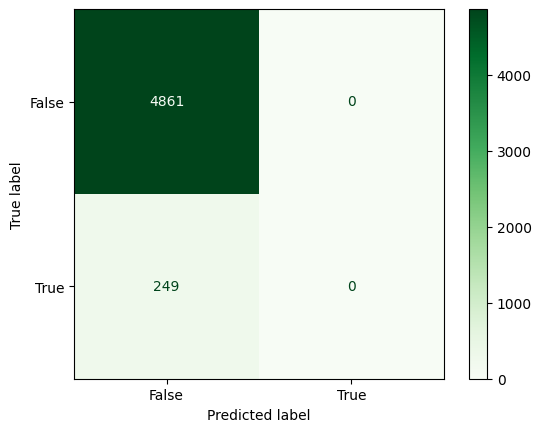

In [9]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot(values_format="0.0f", cmap='Greens')
plt.show()

In [10]:
smote = SMOTE(random_state = 42)

In [11]:
shuffled_df = df_encoded.sample(frac=1, random_state=42)
shuffled_df.reset_index(inplace=True)
shuffled_df.drop(columns=['index'], inplace=True)

In [12]:
inputs = df_encoded.drop("stroke", axis=1).copy()
target = df_encoded["stroke"]

X = inputs.values
y = target.values

kf = KFold(n_splits = k_folds)
kf.get_n_splits(X)

5

In [13]:
cm = np.zeros((2, 2))
acc_score = []
f1_score_array = []
classification_reports = []

for fold_idx, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    x_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    clf.fit(x_train_smote, y_train_smote)

    pred_values =clf.predict(X_test)

    cm += confusion_matrix(y_test, pred_values)

    report = classification_report(y_test, pred_values)

    classification_reports.append(report)

    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)

    f1 = f1_score(pred_values,  y_test)
    f1_score_array.append(f1)

avg_acc_score = np.mean(acc_score)

print('Confusion matrix:')
print(cm)

print('\nClassification Reports:')
for fold_idx, report in enumerate(classification_reports):
    print('Classification Report for fold', fold_idx + 1, ':')
    print(report)

avg_acc_score = sum(acc_score)/5

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))
print('Avg F1 : {}'.format(np.mean(f1_score_array)))
tn, fp, fn, tp = cm.ravel()
wicm = (10*fn + fp)/(tn + fp + fn + tp)
print('Weighted incorrect classification metric: {}'.format(wicm))

Confusion matrix:
[[3548. 1313.]
 [  51.  198.]]

Classification Reports:
Classification Report for fold 1 :
              precision    recall  f1-score   support

           0       0.99      0.74      0.85       969
           1       0.15      0.85      0.26        53

    accuracy                           0.74      1022
   macro avg       0.57      0.79      0.55      1022
weighted avg       0.95      0.74      0.82      1022

Classification Report for fold 2 :
              precision    recall  f1-score   support

           0       0.99      0.71      0.83       980
           1       0.11      0.81      0.19        42

    accuracy                           0.72      1022
   macro avg       0.55      0.76      0.51      1022
weighted avg       0.95      0.72      0.80      1022

Classification Report for fold 3 :
              precision    recall  f1-score   support

           0       0.98      0.76      0.86       966
           1       0.16      0.77      0.26        56

   

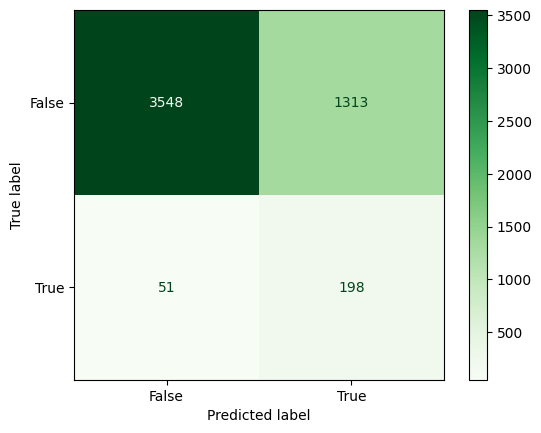

In [14]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot(values_format="0.0f", cmap='Greens')
plt.show()

### Under Sampling

In [15]:
pos = df_encoded[df_encoded['stroke']==1]
neg = df_encoded[df_encoded['stroke']==0]

neg = neg.head(pos.shape[0])
df_undersample = pd.concat([pos,neg],axis=0)
df_undersample = shuffle(df_undersample , random_state=42)
df_undersample.reset_index(drop=True, inplace=True)

inputs = df_undersample.drop('stroke', axis=1).copy()
target = df_undersample['stroke']

In [16]:
X = inputs.values
y = target.values

kf = KFold(n_splits = k_folds)
kf.get_n_splits(X)

5

In [17]:
cm = np.zeros((2, 2))
acc_score = []
f1_score_array = []
classification_reports = []

for fold_idx, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    x_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    clf.fit(x_train_smote, y_train_smote)

    pred_values =clf.predict(X_test)

    cm += confusion_matrix(y_test, pred_values)

    report = classification_report(y_test, pred_values)

    classification_reports.append(report)

    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)

    f1 = f1_score(pred_values,  y_test)
    f1_score_array.append(f1)

avg_acc_score = np.mean(acc_score)

print('Confusion matrix:')
print(cm)

print('\nClassification Reports:')
for fold_idx, report in enumerate(classification_reports):
    print('Classification Report for fold', fold_idx + 1, ':')
    print(report)

avg_acc_score = sum(acc_score)/5

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))
print('Avg F1 : {}'.format(np.mean(f1_score_array)))
tn, fp, fn, tp = cm.ravel()
wicm = (10*fn + fp)/(tn + fp + fn + tp)
print('Weighted incorrect classification metric: {}'.format(wicm))

Confusion matrix:
[[174.  75.]
 [ 48. 201.]]

Classification Reports:
Classification Report for fold 1 :
              precision    recall  f1-score   support

           0       0.80      0.71      0.75        49
           1       0.75      0.82      0.79        51

    accuracy                           0.77       100
   macro avg       0.77      0.77      0.77       100
weighted avg       0.77      0.77      0.77       100

Classification Report for fold 2 :
              precision    recall  f1-score   support

           0       0.76      0.71      0.74        45
           1       0.78      0.82      0.80        55

    accuracy                           0.77       100
   macro avg       0.77      0.76      0.77       100
weighted avg       0.77      0.77      0.77       100

Classification Report for fold 3 :
              precision    recall  f1-score   support

           0       0.78      0.70      0.74        57
           1       0.65      0.74      0.70        43

    acc

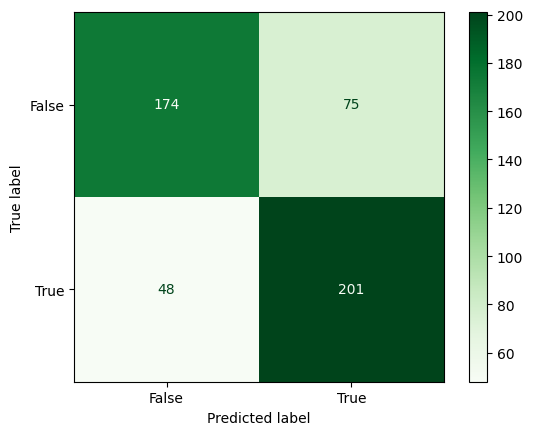

In [18]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot(values_format="0.0f", cmap='Greens')
plt.show()